<a href="https://colab.research.google.com/github/praveen1608/Praveen-Reddy_INFO5731_Spring2024/blob/main/Kadasani_PraveenReddy_Assignment_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [1]:
# Write your code here

import re
import csv
import requests
from io import StringIO

def preprocess_text(text):

    text = text.lower()   # Lowercase the text
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)    # Remove non-alphanumeric characters and extra whitespaces

    # Tokenizing the text
    tokens = text.split()
    return tokens

def generating_ngrams(tokens, n):
    ngrams = []
    for i in range(len(tokens) - n + 1):
        ngrams.append(" ".join(tokens[i:i+n]))
    return ngrams

def counting_ngrams(dataset, n):
    ngram_counts = {}
    for document in dataset:
        tokens = preprocess_text(document)
        ngrams = generating_ngrams(tokens, n)
        for ngram in ngrams:
            ngram_counts[ngram] = ngram_counts.get(ngram, 0) + 1
    return ngram_counts

def calculate_bigram_probabilities(dataset):
    bigram_counts = counting_ngrams(dataset, 2)
    unigram_counts = counting_ngrams(dataset, 1)
    probabilities = {}
    for bigram in bigram_counts:
        words = bigram.split()
        w2 = words[0]
        w1 = words[1]
        if w2 in unigram_counts:
            probabilities[bigram] = bigram_counts[bigram] / unigram_counts[w2]
    return probabilities



# Fetching the CSV content from the GitHub link
url = "https://raw.githubusercontent.com/praveen1608/Praveen-Reddy_INFO5731_Spring2024/main/Text%20data.csv"
response = requests.get(url)
csv_content = response.text

# Parsing the CSV content
dataset = []
csv_reader = csv.reader(StringIO(csv_content))
next(csv_reader)  # Skiping header
for row in csv_reader:
    dataset.append(row[0])  # Assuming the text is in the first column

# (1) Count the frequency of all the N-grams (N=3)
ngram_counts = counting_ngrams(dataset, 3)
print("N-gram counts (N=3):")
print(ngram_counts)
print()

# (2) Calculate the probabilities for all the bigrams in the dataset
bigram_probabilities = calculate_bigram_probabilities(dataset)
print("Bigram probabilities:")
print(bigram_probabilities)
print()


N-gram counts (N=3):
{'killer flower moon': 520, 'flower moon western': 40, 'moon western crime': 40, 'western crime drama': 40, 'crime drama film': 40, 'drama film cowritten': 40, 'film cowritten direct': 40, 'cowritten direct martin': 40, 'direct martin scorses': 40, 'martin scorses base': 40, 'scorses base nonfict': 40, 'base nonfict book': 40, 'nonfict book name': 40, 'book name david': 40, 'name david grann': 80, 'david grann star': 40, 'grann star leonardo': 40, 'star leonardo dicaprio': 40, 'leonardo dicaprio robert': 40, 'dicaprio robert de': 80, 'robert de niro': 400, 'de niro lili': 40, 'niro lili gladston': 40, 'lili gladston touch': 40, 'gladston touch upon': 40, 'touch upon often': 40, 'upon often overlook': 40, 'often overlook piec': 40, 'overlook piec american': 40, 'piec american histori': 40, 'american histori best': 40, 'histori best way': 40, 'best way possibl': 40, 'way possibl thank': 40, 'possibl thank talent': 40, 'thank talent director': 40, 'talent director cas

In [17]:
from nltk.probability import FreqDist

# (3) Extract and calculate relative probabilities of noun phrases
noun_phrases_all_reviews = []
for text in dataset:
    noun_phrases = extract_noun_phrases(text)
    noun_phrases_all_reviews.append(noun_phrases)

noun_phrases_flattened = [phrase for sublist in noun_phrases_all_reviews for phrase in sublist]
noun_phrase_freq = FreqDist(noun_phrases_flattened)

relative_probabilities = {}
for i, review_phrases in enumerate(noun_phrases_all_reviews):
    relative_probabilities[f"Review {i + 1}"] = {
        phrase: noun_phrase_freq[phrase] / max(noun_phrase_freq.values()) for phrase in review_phrases
    }


In [18]:
print("\nRelative probabilities of noun phrases for each review:")
df = pd.DataFrame.from_dict(relative_probabilities, orient='index')
print(df)


Relative probabilities of noun phrases for each review:
             killer flower moon  western crime drama film cowritten  \
Review 1                    1.0                                 0.5   
Review 8                    1.0                                 NaN   
Review 26                   1.0                                 0.5   
Review 33                   1.0                                 NaN   
Review 51                   1.0                                 0.5   
...                         ...                                 ...   
Review 900                  NaN                                 NaN   
Review 925                  NaN                                 NaN   
Review 950                  NaN                                 NaN   
Review 975                  NaN                                 NaN   
Review 1000                 NaN                                 NaN   

             direct martin scorses base nonfict book name david grann star leonardo dicapr

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [2]:
import pandas as pd
import re
import math

# Loading data from the github link
url = "https://raw.githubusercontent.com/praveen1608/Praveen-Reddy_INFO5731_Spring2024/main/Text%20data.csv"
data = pd.read_csv(url)

# Function for preprocessing text
def preprocessing_text(text):
    text = text.lower()   # Converting text to lowercase
    text = re.sub(r'[^\w\s]', '', text)   # Removing punctuation and special characters
    return text

# Preprocess documents
data['Cleaned Reviews'] = data['Cleaned Reviews'].apply(preprocessing_text)

# Function to calculate term frequency (tf)
def calculate_tf(document):
    tf_dict = {}
    total_terms = len(document)
    for term in document:
        tf_dict[term] = tf_dict.get(term, 0) + 1 / total_terms
    return tf_dict

# Function to calculate inverse document frequency (idf)
def calculate_idf(documents):
    idf_dict = {}
    total_documents = len(documents)
    all_terms = set([term for document in documents for term in document])
    for term in all_terms:
        documents_with_term = sum(1 for document in documents if term in document)
        idf_dict[term] = math.log(total_documents / (documents_with_term + 1))  # Add 1 for avoiding division by zero
    return idf_dict

# Function to calculate tf-idf weights
def calculate_tfidf(tf_dict, idf_dict):
    tfidf_dict = {}
    for term, tf in tf_dict.items():
        tfidf_dict[term] = tf * idf_dict[term]
    return tfidf_dict

# Function to calculate cosine similarity between two vectors
def cosine_similarity(vector1, vector2):
    dot_product = sum(vector1[term] * vector2[term] for term in vector1 if term in vector2)
    magnitude1 = math.sqrt(sum(value ** 2 for value in vector1.values()))
    magnitude2 = math.sqrt(sum(value ** 2 for value in vector2.values()))
    return dot_product / (magnitude1 * magnitude2)

# Function to rank documents based on cosine similarity with the query
def rank_documents(documents_tfidf, query_tfidf):
    document_scores = []
    for doc_id, doc_tfidf in enumerate(documents_tfidf):
        score = cosine_similarity(doc_tfidf, query_tfidf)
        document_scores.append((doc_id, score))
    document_scores.sort(key=lambda x: x[1], reverse=True)
    return document_scores


# Extract documents and convert to list of words
documents = data['Cleaned Reviews'].str.split()

# Calculate tf for each document
tf_dicts = [calculate_tf(doc) for doc in documents]

# Calculate idf for all terms
idf_dict = calculate_idf(documents)

# Calculate tf-idf weights for each document
documents_tfidf = [{term: tf * idf_dict[term] for term, tf in tf_dict.items()} for tf_dict in tf_dicts]

# Defining a query
query = "An Outstanding movie with a haunting performance and best character development"
preprocessed_query = preprocessing_text(query).split()
query_tf = calculate_tf(preprocessed_query)
query_tfidf = {term: tf * idf_dict.get(term, 0) for term, tf in query_tf.items()}

# Rank documents based on cosine similarity with the query
document_scores = rank_documents(documents_tfidf, query_tfidf)

# Print ranked documents
for rank, (doc_id, score) in enumerate(document_scores, start=1):
    print(f"Rank {rank}: Document {doc_id}, Cosine Similarity Score: {score}")


Rank 1: Document 9, Cosine Similarity Score: 0.0919835940230309
Rank 2: Document 34, Cosine Similarity Score: 0.0919835940230309
Rank 3: Document 59, Cosine Similarity Score: 0.0919835940230309
Rank 4: Document 84, Cosine Similarity Score: 0.0919835940230309
Rank 5: Document 109, Cosine Similarity Score: 0.0919835940230309
Rank 6: Document 134, Cosine Similarity Score: 0.0919835940230309
Rank 7: Document 159, Cosine Similarity Score: 0.0919835940230309
Rank 8: Document 184, Cosine Similarity Score: 0.0919835940230309
Rank 9: Document 209, Cosine Similarity Score: 0.0919835940230309
Rank 10: Document 234, Cosine Similarity Score: 0.0919835940230309
Rank 11: Document 259, Cosine Similarity Score: 0.0919835940230309
Rank 12: Document 284, Cosine Similarity Score: 0.0919835940230309
Rank 13: Document 309, Cosine Similarity Score: 0.0919835940230309
Rank 14: Document 334, Cosine Similarity Score: 0.0919835940230309
Rank 15: Document 359, Cosine Similarity Score: 0.0919835940230309
Rank 16: 

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

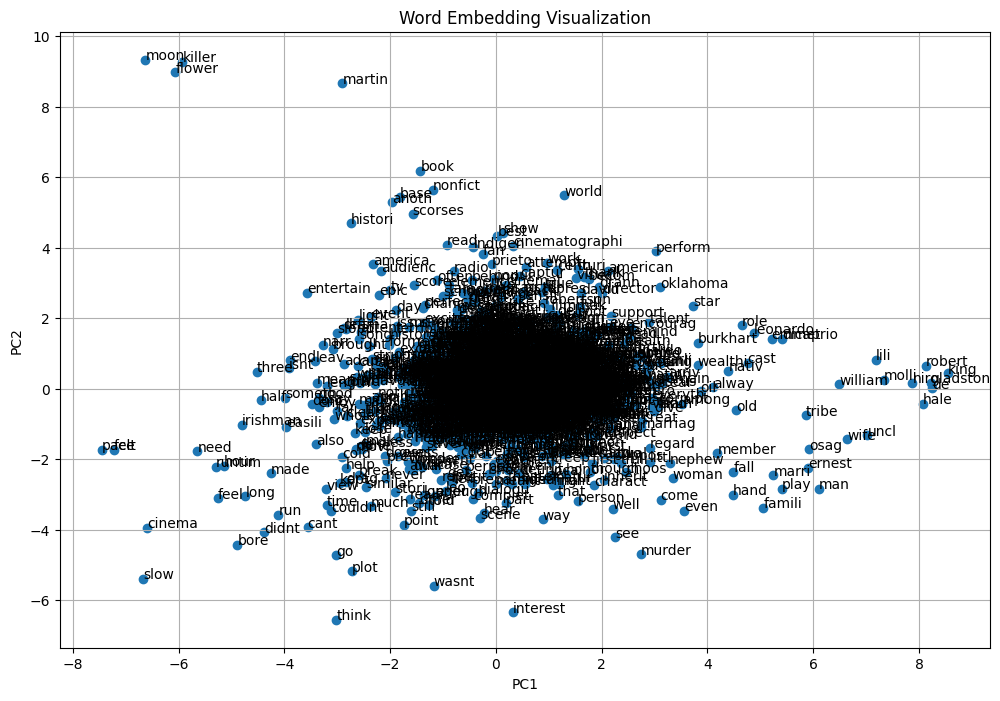

In [3]:
# Write your code here

# Importing the necessary libraries
import gensim
from gensim.models import Word2Vec
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Loading data from the github link
url = "https://raw.githubusercontent.com/praveen1608/Praveen-Reddy_INFO5731_Spring2024/main/Text%20data.csv"
data = pd.read_csv(url)

# Preprocess the text data (assuming the column containing text is named 'text')
processed_data = [text.split() for text in data['Cleaned Reviews']]

# Training the word2vec model
model = Word2Vec(sentences=processed_data, vector_size=300, window=5, min_count=1, workers=4)

# Visualize word embeddings
def plot_embeddings(model):
    words = list(model.wv.index_to_key)
    vectors = [model.wv[word] for word in words]

    # Reduce dimensionality for visualization
    from sklearn.decomposition import PCA
    pca = PCA(n_components=2)
    vectors_2d = pca.fit_transform(vectors)

    # Ploting
    plt.figure(figsize=(12, 8))
    plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], marker='o')

    for i, word in enumerate(words):
        plt.annotate(word, xy=(vectors_2d[i, 0], vectors_2d[i, 1]))

    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('Word Embedding Visualization')
    plt.grid(True)
    plt.show()

# Plot embeddings
plot_embeddings(model)






## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [6]:
# The GitHub link of your final csv file


# Link:  https://github.com/praveen1608/Praveen-Reddy_INFO5731_Spring2024/blob/main/train_eval.csv



# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [7]:
# Type your answer

'''
This assignment made us to think better and helped us in gaining the hands on experience with the given tasks TF-IDF,
word embedding and creation of dataset for sentiment analysis.

The challenging part in this assignment was question number 1 for me personally I felt that, because working on code
is one part and the execution is next part. I faced few issues while executing the code, system is facing issues like
hanging. Even the colab page was not responding after we run the code for few times. Other than that everything went
smoothly.

Working on question 2,3 was great. I enjoyed working on cosine similarity and ploting the visualization.

Provided time for doing the assignment was surely enough as we got 1 week to work on the given tasks.

'''

'\nThis assignment made us to think better and helped us in gaining the hands on experience with the given tasks TF-IDF,\nword embedding and creation of dataset for sentiment analysis. \n\nThe challenging part in this assignment was question number 1 for me personally I felt that, because working on code\nis one part and the execution is next part. I faced few issues while executing the code, system is facing issues like\nhanging. Even the colab page was not responding after we run the code for few times. Other than that everything went\nsmoothly.\n\nWorking on question 2,3 was great. I enjoyed working on cosine similarity and ploting the visualization.\n\nProvided time for doing the assignment was surely enough as we got 1 week to work on the given tasks.\n\n'